In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/f/Documents/Ironhack/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [6]:
df.shape

(2443651, 9)

In [7]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


#### What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


In [8]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

#### Which are the top 5 most listed product categories?

In [13]:
df1 = df['category'].value_counts().sort_values(ascending=False)
df1 = pd.DataFrame(df1)
df1.head(5)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


#### Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

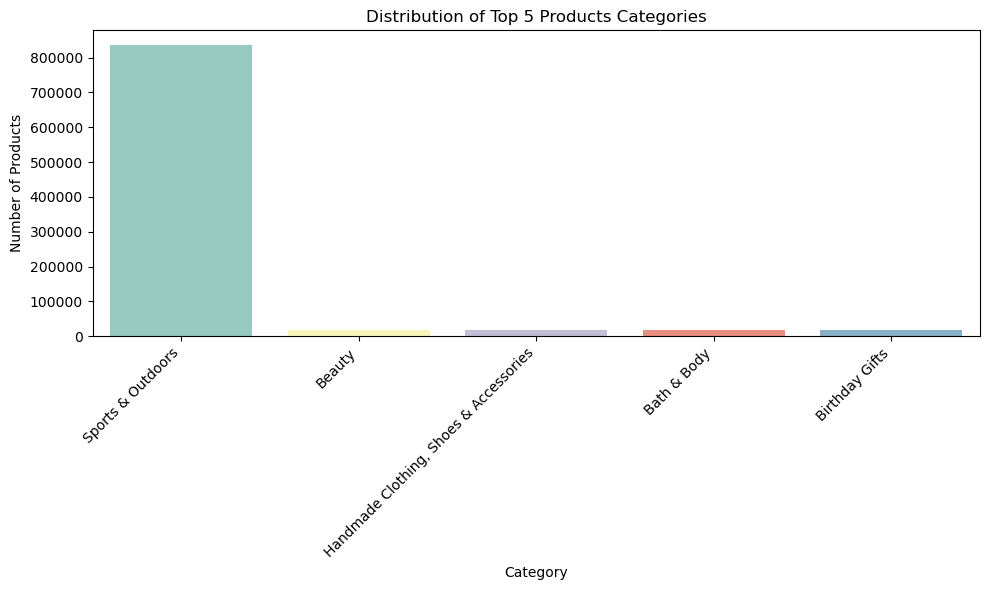

In [21]:
frequency_table = df['category'].value_counts().sort_values(ascending=False)
frequency_table = pd.DataFrame({'category': frequency_table.index, 'count': frequency_table.values})

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='count', data=frequency_table.head(5), palette='Set3')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Top 5 Products Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

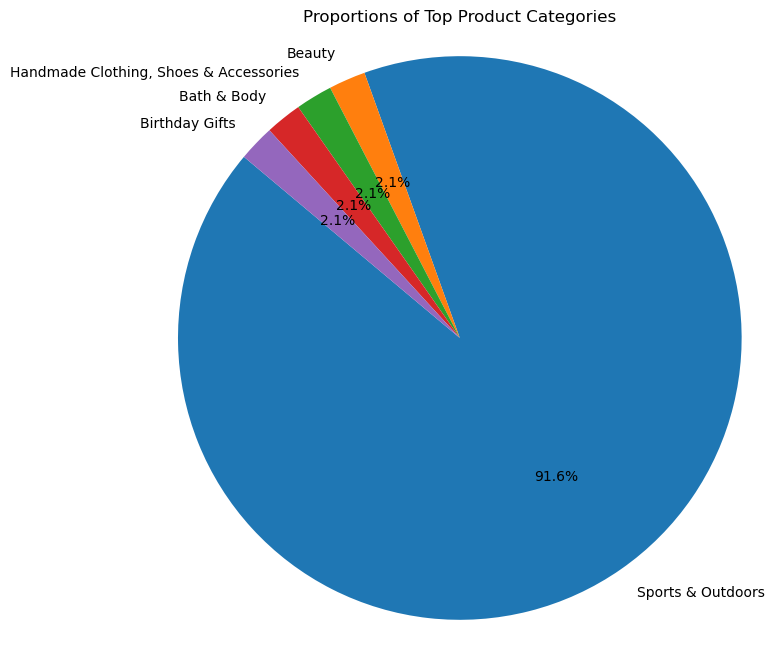

In [23]:
import matplotlib.pyplot as plt

# Calculate the top categories
top_categories = df['category'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Top Product Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Calculate the mean, median, and mode for the price of products.

#### Measures of Centrality
#### What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [37]:
# Calculate the mean (average) price
average_price = df['price'].mean()

median_price = df['price'].median()

# Calculate the mode (most common) price
mode_price = df['price'].mode()[0]

print("Average price:", average_price)
print("Median price:", median_price)
print("Mode price:", mode_price)


Average price: 89.24380943923663
Median price: 19.09
Mode price: 9.99


#### The most frequent (mode) sale price is $9.99. This value appears more frequently than any other price in the dataset.

#### Measures of Dispersion
#### How varied are the product prices? Are there any indicators of a significant spread in prices?
#### Determine the variance, standard deviation, range, and interquartile range for product price.

In [35]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

#### The variance, a measure of how far each sale price in the set is from the mean, is approximately (119.445). A high variance implies that sale prices can be quite different from one another.
#### The range of sale prices is $100.000, calculated as the difference between the maximum and minimum prices. This wide range underscores the diversity in product prices within the dataset.

#### Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

In [39]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


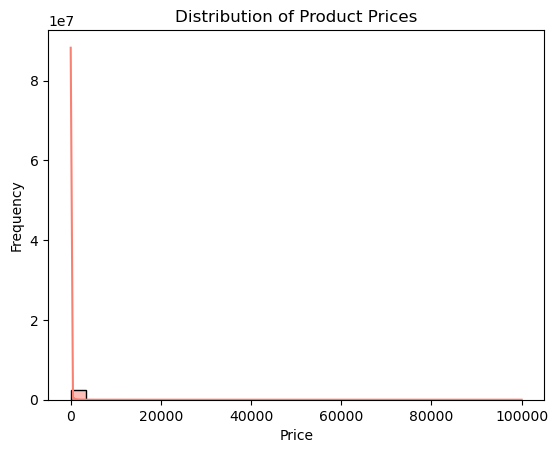

In [43]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

<Axes: >

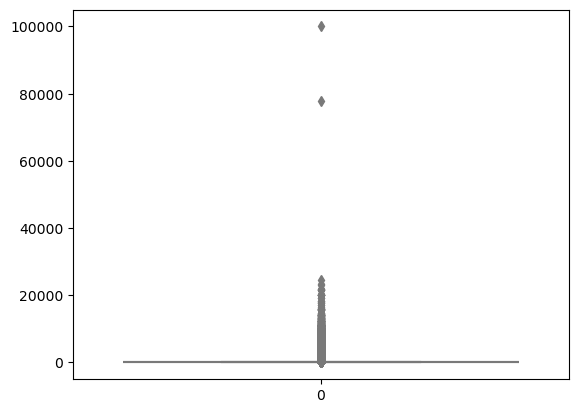

In [41]:
sns.boxplot(data = df['price'], color="lightblue")

In [48]:
# Calculate the mean, median, and mode for the rating of products.
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [49]:
reviews_mean = df['stars'].mean()
reviews_med = df['stars'].median()
reviews_mode = df['stars'].mode()
reviews_std = df['stars'].std()
reviews_var = df['stars'].var()
reviews_min = df['stars'].min()
reviews_max = df['stars'].max()

print(f'reviews std: {reviews_std}\nreviews var: {reviews_var}\nreviews min: {reviews_min}\nreviews max: {reviews_max}')

print(f"reviews mean: {reviews_mean} \nreviews median: {reviews_med} \nreviews mode: {reviews_mode}")

reviews std: 2.1948653785054697
reviews var: 4.81743402976196
reviews min: 0.0
reviews max: 5.0
reviews mean: 2.152836472966065 
reviews median: 0.0 
reviews mode: 0    0.0
Name: stars, dtype: float64


In [50]:
# How do customers generally rate products? Is there a common trend?
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)


print(f'{Q1}, {Q3}')

0.0, 4.4


In [51]:
review_skew=df['stars'].skew()
review_kurt = df['stars'].kurtosis()

print(f'Skewness: {review_skew}. Intepretation: Reviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.\nKurtosis: {review_kurt}. Interpretation: Negative kurtosis indicates flat distribution.')

Skewness: 0.08120735761080985. Intepretation: Reviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.
Kurtosis: -1.9260061280432985. Interpretation: Negative kurtosis indicates flat distribution.


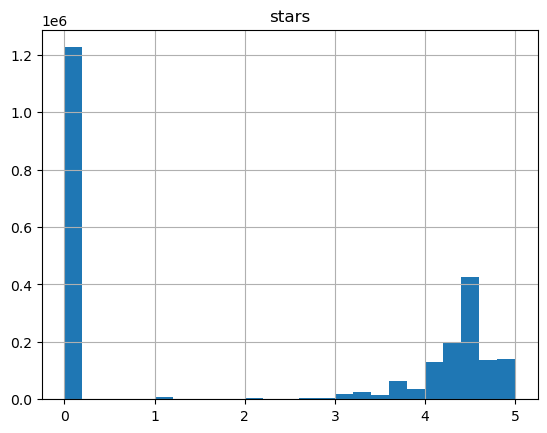

In [52]:
ax=df.hist(column='stars', bins=25)

In [53]:
#if users just skipped rating and that's why there's so many 0 star ratings then we can remove 0s

df5=df[df['stars'] >0]

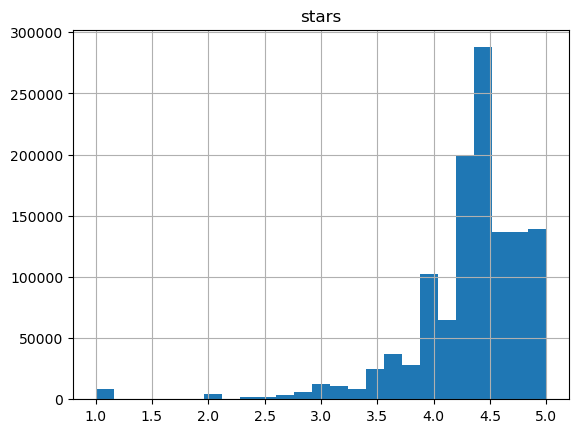

In [54]:
ax2=df5.hist(column='stars', bins=25)

In [55]:
review_skew2=df5['stars'].skew()
review_kurt2 = df5['stars'].kurtosis()
df5['stars'].describe()

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [56]:
print(f'Skewness without 0 ratings: {review_skew2}. Kurtosis without 0 ratings: {review_kurt2}')

Skewness without 0 ratings: -2.3795681122127945. Kurtosis without 0 ratings: 9.78193769066435


In [57]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
